## Initializing a source and starting to simulate


### General Structure: 
 The general structure of the program is that,
 1. First a source object **S** gehts defined.
 2. Then the source object will get passed on to the simulation object **Sim** which will get defined next. 
 3.  Finally the visual object **V** will get defined, using the simulation object as input. 

This way, the general structure is **S $\rightarrow$ Sim $\rightarrow$ V $\rightarrow$ output**

### This example
* We are going to consider the one temperature model, only electron temperature first and then also include the  lattice temperature. 
* We are considering one layer of SRO and one layer of STO behind it. 
* A laser pulse, Gaussian in time and exponentially decaying in space will be our source of heating.

In [4]:
from NTMpy import NTMpy as ntm
from matplotlib import pyplot as plt
import numpy as np
import numericalunits as u
u.reset_units('SI')

Setting up the Source. 
We consider a exponentially decay in space, according to Lambert-Beer’s law and a Gaussian evolution in space. Such that: 
$S(x,t) = \lambda e^{-\lambda x}\cdot G(t-t_0)$,
where $\lambda = \frac{1}{opticalPenDepth}$

In [5]:
#Define a Source
s                           = ntm.source()
s.optical_penetration_depth = [45*u.nm,90*u.nm]  #Optical penetration depth for each layer 
s.FWHM                      = 1*u.ps             #Full width half max of the laser pulse
s.fluence                   = 15*u.mJ/u.cm**2    #Fluence of the laser
s.t0                        = 5*u.ps             #Time when Gaussian peaks


Considering the one temperature model.
We set up a simulation object **sim** and plug in the material specific parameters.
I.e. length of material, heat conductivity $k_i(T(x,t))$, heat Capacity $C_i(T(x,t))$, density of material $\rho_i$. 
Note, that $k_i$ and $C_i$ can be both, a function of the temperature or a constant. 

In [6]:
#1 Temperature model: Set up simulation 
#Define numer of Temperatures taken into consideration 1 => only electron temperature
#Pass on the source object s as an input parameter
sim = ntm.simulation(1,s) 
#add layers (Length,conductivity,heatCapacity,density)
sim.addLayer(40e-9,[6],[lambda Te: 0.112*Te],6500) #SRO Layer
sim.addLayer(80e-9,[12],[lambda Te: 0.025*Te],5100)#STO Layer
sim.final_time = 50*u.ps                           #final time of the simulation

In order to get the data output, one just has to execute the following command. 

In [7]:
#To get the raw output
[phi_E,x,t] = sim.run() 

-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 3.55e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied.
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 1438/1438 [00:00<00:00, 5098.00it/s]


-----------------------------------------------------------
Electron temperature heat diffusion has been simulated.
Eleapsed time in E.E.- loop: 0.2820713520050049
-----------------------------------------------------------


No specific time step for the simulation needs to be given (but can be). We estimate the stability region for the Explicit Euler method automatically and run it according to that. 
In the box above, `phi_E` is a matrix, giving the temperature evolution in time and space *(a method of lines approach is used)*. `x` and `t` is the space and time grid respectively.

In order to quickly show results, we also created a pre made visualization class: **V**. 

Here **Sim** needs to be given as an input argument. 

------------------------------------------------------------
The simulation object of the1 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied.
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 1438/1438 [00:00<00:00, 6137.68it/s]


-----------------------------------------------------------
Electron temperature heat diffusion has been simulated.
Eleapsed time in E.E.- loop: 0.24991250038146973
-----------------------------------------------------------


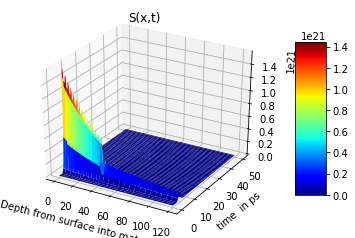

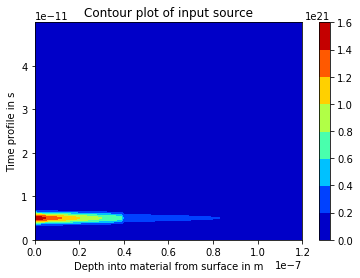

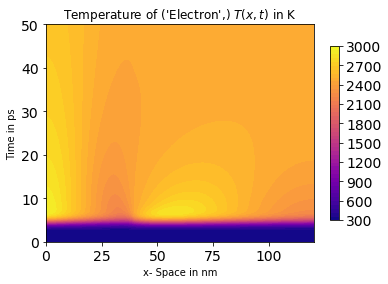

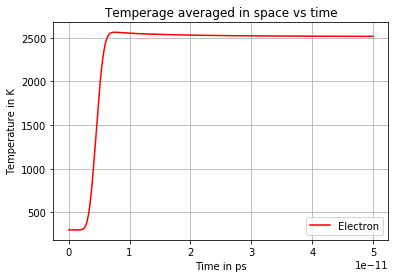

(array([0.00000000e+00, 3.55265061e-14, 7.10530123e-14, ...,
        4.99147411e-11, 4.99502676e-11, 4.99857941e-11]),
 array([ 300.        ,  300.00000711,  300.00001614, ..., 2516.01362336,
        2516.01033188, 2516.00705633]))

In [8]:
#Visualize result
#Create a visual object where the simulation gets passed on 
v  = ntm.visual(sim)
#output of v.source is the full matrix of the source(x,t)
so = v.source()
#A contourplot of the electron system
v.contour('Electron')
#Electron temperature averaged over space vs time. (weighted average with respect to length of material)
v.average()

In order to see an animation of the dynamics one can simply execute `v.animation(speed)`. 

Simulation of a 1-temperature system


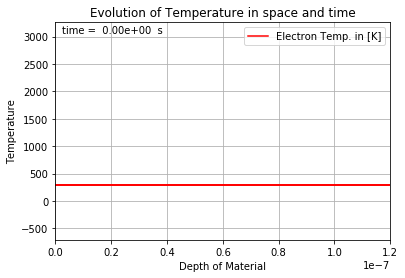

In [9]:
#Animation of dynamics
#animate the result input parameter is the speed of the animation
v.animation(1)

### 2 Temperature example
In order to do simulate two temperature dynamics, electron and lattice we only modify the **Sim** object. 
Now we have to provide the object three additional parameters, i.e. the conductivity of the lattice system for every layer under consideration $k_i^L(T^L(x,t))$ the capacity of the lattic system $C_i^L(T^L(x,t))$ and the coupling constant $G_i$ which denotes the strength of the coupling between both systems. ($G_i\cdot(T^L-T^E)$ for the electron system and $G_i\cdot(T^E-T^L)$ for the lattice system in every layer $i = 1,2,...$).

In [10]:
#Temperature Model: 
#Two temperatures are considered, electron and lattice
sim = ntm.simulation(2,s)
#add parameters for both layers and both systems
#sim.addLayer(length,conductivity,heatCapacity,density,coupling)
sim.addLayer(40e-9,[6,1],[lambda Te: 0.112*Te,450],6500,5e17) #SRO Layer
sim.addLayer(80e-9,[12,1],[lambda Te: 0.025*Te,730],5100,5e17)#STO Layer
sim.final_time = 50*u.ps
#To get the raw output
[phi_E,phi_L,x,t] = sim.run() 

-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 2.79e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied.
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 1790/1790 [00:00<00:00, 2787.78it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 0.6420888900756836
-----------------------------------------------------------


As above, to get the raw output of the data, one has to execute `[phi_E,phi_L,x,t] = sim.run()`, where `phi_E`, `phi_L` are two matrices containing the evolution of the electron and the lattice temperature in 1D space and time. `x` and `t` are the output of the space and the time grid.
As before we can use the implemented visualization tools, to quickly depict the obtained solution. 

------------------------------------------------------------
The simulation object of the2 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied.
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 1790/1790 [00:00<00:00, 3096.77it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 0.5780215263366699
-----------------------------------------------------------


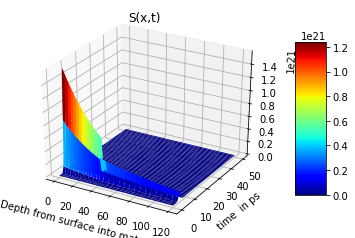

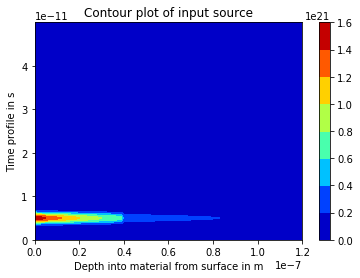

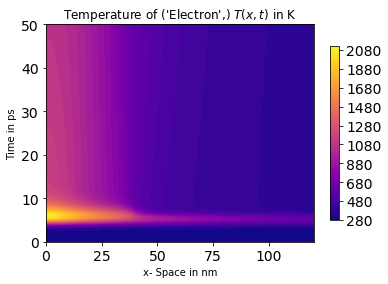

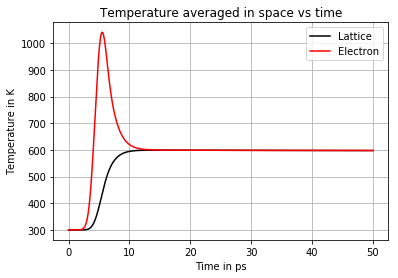

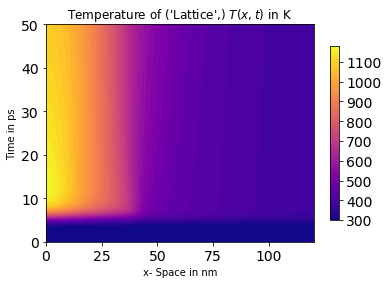

In [11]:
#Visualize result
#Create a visual object where the simulation gets passed on 
v = ntm.visual(sim)
#output of v.source is the full matrix of the source(x,t)
so = v.source()
#A contourplot of the electron system
v.contour('Electron')
v.average()
#This will only work in the two temperature case.
v.contour('Lattice') 

Simulation of a 2- temperature system


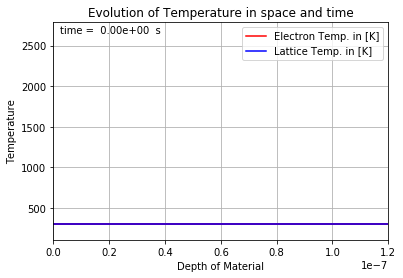

In [12]:
#animate the result input parameter is the speed of the animation
v.animation(1)

Of course input parameters can be changed and modified according to individual simulation experiments. Examples on that will be shown in the Wiki page of the GitHub. 